### Import Data

In [1]:
# Configuration
import pandas as pd
import numpy as np
from numpy import nan
import os
import datetime as dt
import matplotlib.pyplot as plt
from IPython.display import HTML, display
import tabulate
from scipy import stats
import re
import statsmodels.api as sm
import easygui

# import sys
# !conda install --yes --prefix {sys.prefix} tabulate
# import sys
# !pip install mixpanel



pd.options.display.float_format = '{:,.2f}'.format

In [2]:
## load repeatable functions
from data_wrangler_utils import file_aggregator, get_files, get_user_files, string_array_to_array, vars_from_array_response, ndefine, dict_to_vars, reverse, get_results_table
from data_wrangler_dicts import cat_to_num_dict, var_dict, score_dict

In [3]:
desired_col_red = [
    'event', 'time', 'distinct_id', 'language', 'categories', 'category_scores', 
    'question_labels', 'question_scores', 'response_id', 'total_score'
]
df_2021b = pd.read_csv('C:/Users/benar/Dropbox/0000 Jupyter/SCS/MixPanel/csvs/aggregated/mixpanel_events_from_2021-07-01_to_2021-12-31.csv', usecols=desired_col_red)
df_2022a = pd.read_csv('C:/Users/benar/Dropbox/0000 Jupyter/SCS/MixPanel/csvs/aggregated/mixpanel_events_from_2022-01-01_to_2022-06-30.csv', usecols=desired_col_red)
df_2022b = pd.read_csv('C:/Users/benar/Dropbox/0000 Jupyter/SCS/MixPanel/csvs/aggregated/mixpanel_events_from_2022-07-01_to_2022-10-31.csv', usecols=desired_col_red)


In [127]:
df = df_2021b.append(df_2022a)

df = df.append(df_2022b)

df = df[df['event'] == 'Complete Assessment']


In [29]:
# df.to_csv('C:/Users/benar/Dropbox/0000 Jupyter/SCS/MixPanel/scs_assessments/mixpanel_complete_assessment_events_from_2021-07-01_to_2022-10-31')
df = pd.read_csv('C:/Users/benar/Dropbox/0000 Jupyter/SCS/MixPanel/scs_assessments/mixpanel_complete_assessment_events_from_2021-07-01_to_2022-10-31')

### Recode and type the data

In [5]:
# data preprocess

response_arrays = string_array_to_array(df.question_scores)

        

    

In [31]:
# Create item-level variables and recode
%run utils
%run dicts
var_dict = vars_from_array_response (response_arrays, var_dict)


df_assessments_temp = dict_to_vars(df, var_dict)
    
col_names = [
    
    'event', 'time', 'distinct_id', 'language', 'response_id', 
    'categories', 'category_scores', 'question_labels', 'question_scores', 'total_score',
    
    'phq_suicide', 'phq_gad_1', 'phq_gad_2', 'phq_dep_1', 'phq_dep_2',
    
    'wemwbs_1', 'wemwbs_2', 'wemwbs_3', 'wemwbs_4', 'wemwbs_5', 'wemwbs_6',
    'wemwbs_7', 'wemwbs_8', 'wemwbs_9', 'wemwbs_10', 'wemwbs_11',
    'wemwbs_12', 'wemwbs_13', 'wemwbs_14', 
    
    'retired', 
    
    'wsas_1', 'wsas_2', 'wsas_3', 'wsas_4', 'wsas_5'
]

phq_names = [
    'phq_suicide', 'phq_gad_1', 'phq_gad_2', 'phq_dep_1', 'phq_dep_2'
]

wemwbs_names = [
    'wemwbs_1', 'wemwbs_2', 'wemwbs_3', 'wemwbs_4', 'wemwbs_5', 'wemwbs_6',
    'wemwbs_7', 'wemwbs_8', 'wemwbs_9', 'wemwbs_10', 'wemwbs_11',
    'wemwbs_12', 'wemwbs_13', 'wemwbs_14'
]

wsas_names = [
    'wsas_1', 'wsas_2', 'wsas_3', 'wsas_4', 'wsas_5'
]

df_assessments = df_assessments_temp
df_assessments[phq_names] = \
    df_assessments_temp[phq_names].replace(cat_to_num_dict).apply(pd.to_numeric, errors='coerce')


In [32]:
# Calculate Scores!

wemwbs_names = [
    'wemwbs_1', 'wemwbs_2', 'wemwbs_3', 'wemwbs_4', 'wemwbs_5', 'wemwbs_6',
    'wemwbs_7', 'wemwbs_8', 'wemwbs_9', 'wemwbs_10', 'wemwbs_11',
    'wemwbs_12', 'wemwbs_13', 'wemwbs_14'
]

wsas_names = [
    'wsas_1', 'wsas_2', 'wsas_3', 'wsas_4', 'wsas_5'
]

df_assessments = df_assessments.assign( 
    phq_gad_score = df_assessments[['phq_gad_1', 'phq_gad_2']].mean(axis=1)*2)
df_assessments = df_assessments.assign(
    phq_dep_score = df_assessments[['phq_dep_1', 'phq_dep_2']].mean(axis=1)*2)
df_assessments = df_assessments.assign(
    phq_mood_score = df_assessments.phq_gad_score + df_assessments.phq_dep_score)
df_assessments = df_assessments.assign(
    wemwbs_score = df_assessments[wemwbs_names].mean(axis=1)*14)
df_assessments = df_assessments.assign(
    wsas_score = df_assessments[wsas_names].mean(axis=1)*5)


C:\Users\benar\AppData\Local\Temp/ipykernel_15888/3059554167.py:20: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  wemwbs_score = df_assessments[wemwbs_names].mean(axis=1)*14)
C:\Users\benar\AppData\Local\Temp/ipykernel_15888/3059554167.py:22: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  wsas_score = df_assessments[wsas_names].mean(axis=1)*5)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [33]:
# compare our scores to the pre-tabulated scores
%run dicts
df_assessments['cat_arrays'] = string_array_to_array(df_assessments.category_scores)

score_dict = vars_from_array_response (df_assessments.cat_arrays, score_dict)

df_assessments = dict_to_vars(df_assessments, score_dict, undefined=True)

df_assessments.gs_mood_score = reverse(df_assessments.gs_mood_score, 12)
df_assessments.gs_wsas_score = reverse(df_assessments.gs_wsas_score, 40)

In [34]:
# set up datetime
df_assessments['time'] = pd.to_datetime(df_assessments['time'], format='%Y-%m-%dT%H:%M:%S')

In [35]:
df_assessments['gs_wemwbs_score']

0        50.00
1        49.00
2        56.00
3        22.00
4        53.00
          ... 
186290   31.00
186291   49.00
186292   32.00
186293   31.00
186294   45.00
Name: gs_wemwbs_score, Length: 186295, dtype: float64

### Create specialized datasets


In [37]:
# select the first observation for each individual

# sort by ID and date
df_assessments.sort_values(by=['distinct_id','time'], inplace=True, ascending=True)

# first assessments, last assessments, and first and last for each uuid on a single line
df_assess_first = df_assessments.groupby('distinct_id', as_index=False).first()
df_assess_last = df_assessments.groupby('distinct_id', as_index=False).last()
df_assess_last = df_assess_last.add_suffix('_last')
df_assess_fl = df_assess_first.join(df_assess_last)

# add a week index
df_assess_first['week_index'] = ((df_assess_first.time - dt.datetime(2021, 1, 1)).dt.days / 7).astype(int)
df_week = df_assess_first.groupby(df_assess_first.week_index).mean()




In [25]:
# df_assessments.to_csv('mixpanel_processed_assessment_events_from_2021-07-01_to_2022-10-31')
df_assessments = pd.read_csv('mixpanel_processed_assessment_events_from_2021-07-01_to_2022-10-31')
df_assessments['time'] = pd.to_datetime(df_assessments['time'])
# df_assess_fl.to_csv('C:/Users/benar/Dropbox/0000 Jupyter/SCS/MixPanel/scs_assessments/mixpanel_users_assess_fl_scores_from_2021-07-01_to_2022-10-31')
df_assess_fl = pd.read_csv('C:/Users/benar/Dropbox/0000 Jupyter/SCS/MixPanel/scs_assessments/mixpanel_users_assess_fl_scores_from_2021-07-01_to_2022-10-31')
df_assess_fl['time'] = pd.to_datetime(df_assess_fl['time'])
df_assess_fl['time_last'] = pd.to_datetime(df_assess_fl['time_last'])

### Analyses - Change scores

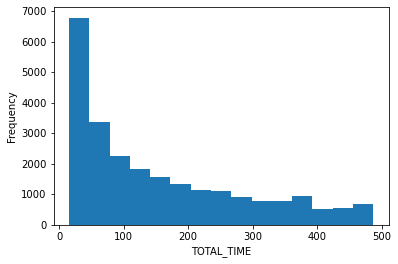

var,diff,sd,d
mood,-0.88,3.25,-0.27
wb,2.00,9.96,0.20
func,-0.87,8.65,-0.10


In [45]:
# Change scores for people w 2 questionnaires, separated by X days
%run utils

df_assess_fl['total_time'] = (df_assess_fl.time_last - df_assess_fl.time).dt.days
df_assess_fl['dep_diff'] = (df_assess_fl.phq_dep_score_last - df_assess_fl.phq_dep_score)
df_assess_fl['anx_diff'] = (df_assess_fl.phq_gad_score_last - df_assess_fl.phq_gad_score)
df_assess_fl['mood_diff'] = (df_assess_fl.gs_mood_score_last - df_assess_fl.gs_mood_score)
df_assess_fl['func_diff'] = (df_assess_fl.gs_wsas_score_last - df_assess_fl.gs_wsas_score)
df_assess_fl['wb_diff'] = (df_assess_fl.gs_wemwbs_score_last - df_assess_fl.gs_wemwbs_score)

morethanone = df_assess_fl.loc[df_assess_fl['total_time'] > 14]

ax = morethanone['total_time'].plot(kind='hist', bins=15)
ax.set_xlabel('TOTAL_TIME')
ax.set_ylabel('Frequency')
plt.show()


headers = ['var', 'diff', 'sd', 'd']
score_vars = ['mood_diff', 'wb_diff', 'func_diff']
score_labels = ['mood', 'wb', 'func']

get_results_table(morethanone, headers, score_vars, score_labels, d=True)



In [47]:
df_accesses = pd.read_csv('C:/Users/benar/Dropbox/0000 Jupyter/SCS/MixPanel/csvs/processed/mixpanel_use_resource_unduplicated_events_from_2020-04-05_to_2022-10-31.csv')
df_accesses.columns

Index(['Unnamed: 0', 'event', 'time', 'distinct_id', 'device',
       'initial_referrer', 'initial_referring_domain', 'os',
       'referring_domain', 'language', 'url', 'url_name', 'timestamp'],
      dtype='object')

In [64]:
# Compute number of resources accessed per user
# Compute number of weeks with a resource accessed
date1 = '2022-01-01'
date2 = '2022-03-31'

df_work = df_assess_fl[(df_assess_fl['time'] >= date1) & (df_assess_fl['time'] <= date2)]
print(len(df_work))
df_access_count = df_accesses.groupby('distinct_id').count()

df_access_count2 = df_access_count[['timestamp']]

df_access_count2.columns = ['access_count']

df_work = pd.merge(df_work, df_access_count2[['access_count']], on='distinct_id', how='left') 
df_work['access_count'] = df_work['access_count'].fillna(0)


df_work_14 = df_work[df_work['total_time'] >= 14]
print(len(df_work), len(df_work_14))


# df_assess_fl_oneplus['total_time'] = (df_assess_fl_oneplus.timestamp_last - df_assess_fl_oneplus.timestamp).dt.days
# df_assess_fl_oneplus['dep_diff'] = (df_assess_fl_oneplus.phq_dep_score_last - df_assess_fl_oneplus.phq_dep_score)
# df_assess_fl_oneplus['anx_diff'] = (df_assess_fl_oneplus.phq_gad_score_last - df_assess_fl_oneplus.phq_gad_score)
# df_assess_fl_oneplus['mood_diff'] = (df_assess_fl_oneplus.phq_mood_score_last - df_assess_fl_oneplus.phq_mood_score)
# df_assess_fl_oneplus['func_diff'] = (df_assess_fl_oneplus.wsas_score_last - df_assess_fl_oneplus.wsas_score)
# df_assess_fl_oneplus['wb_diff'] = (df_assess_fl_oneplus.wemwbs_score_last - df_assess_fl_oneplus.wemwbs_score)

morethanone = df_work_14[df_work_14['access_count'] >= 1]

headers = ['var', 'diff', 'sd', 'd']
score_vars = ['anx_diff', 'dep_diff', 'mood_diff', 'wb_diff', 'func_diff']
score_labels = ['anx', 'dep', 'mood', 'wb', 'func']

get_results_table(df_work_14, headers, score_vars, score_labels, d=True)
get_results_table(morethanone, headers, score_vars, score_labels, d=True)


22905
22905 6364


var,diff,sd,d
anx,0.63,1.83,0.35
dep,0.64,1.82,0.35
mood,-1.07,3.21,-0.33
wb,2.56,10.03,0.25
func,-1.21,8.93,-0.14


var,diff,sd,d
anx,0.67,1.88,0.36
dep,0.68,1.87,0.36
mood,-1.36,3.28,-0.42
wb,3.18,9.92,0.32
func,-1.55,8.81,-0.18


6364 3301


In [40]:
columns = [
    'uuid', 'timestamp', 'phq_suicide', 'retired', 
    'wsas_1', 'wsas_2', 'wsas_3', 'wsas_4', 'wsas_5', 
    'phq_gad_score', 'phq_dep_score', 'phq_mood_score', 'wemwbs_score', 'wsas_score', 
    'timestamp_last', 'phq_suicide_last', 'retired_last',
    'wsas_1_last', 'wsas_2_last', 'wsas_3_last', 'wsas_4_last', 'wsas_5_last', 
    'phq_dep_score_last', 'phq_mood_score_last', 'wemwbs_score_last', 'wsas_score_last'
]
df_assess_fl_new.to_csv('WTC Assessments - ' + months[0] + ' to ' + months[-1] + '.csv', columns = columns, index=False)